In [ ]:

#Importação do drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
cores_vivas = sns.color_palette("bright")



Tipo de membro

In [ ]:
#Caminho do arquivo
cam5 = '/content/drive/MyDrive/Analises/2021/tipo_membro.csv'
df5 = pd.read_csv(cam5)

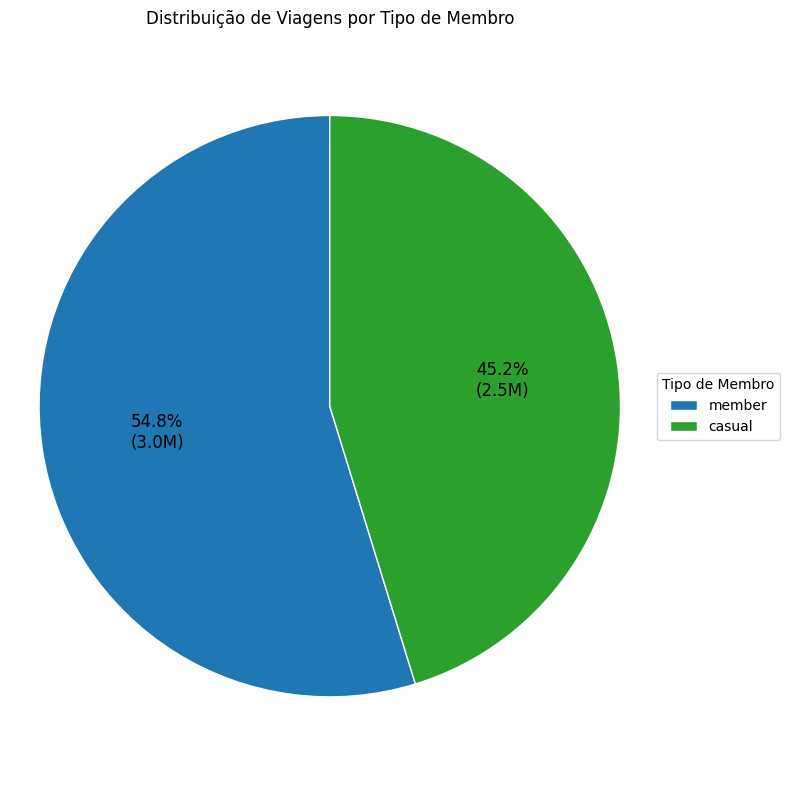

In [ ]:

labels = df5['tipo_uso']
sizes = df5['total']

# transforma uma porcentagem em um valor absoluto baseado no total e formata uma string para exibição nos gráficos
def func_pct_abs(pct, all_vals):
    absolute = pct / 100. * sum(all_vals)
    return f"{pct:.1f}%\n({absolute/1e6:.1f}M)"

# Criação do gráfico
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct=lambda pct: func_pct_abs(pct, sizes),
    startangle=90,
    colors=['#1f77b4','#2ca02c'],
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

ax.legend(
    wedges,
    labels,
    title="Tipo de Membro",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Distribuição de Viagens por Tipo de Membro')
plt.axis('equal')
plt.tight_layout()
plt.show()

Estação de destino

In [ ]:
#Caminho do gráfico
caminho = '/content/drive/MyDrive/Analises/2021/estacao_destino.csv'
df = pd.read_csv(caminho)


In [ ]:
#Filtragem por tipo de usuário
df_membros = df[df['tipo_uso'] == 'member'].sort_values(by='total_viagens', ascending=False).head(10)
df_casuais = df[df['tipo_uso'] == 'casual'].sort_values(by='total_viagens', ascending=False).head(10)

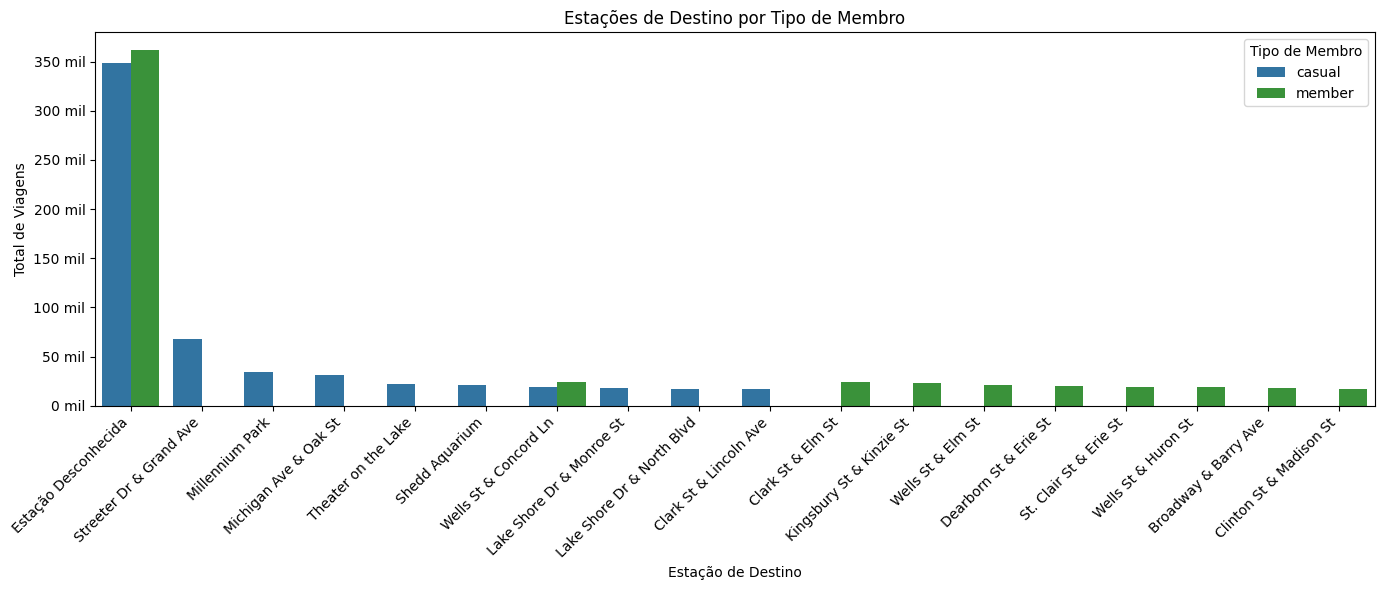

In [ ]:
# Criação do gráfico
plt.figure(figsize=(14, 6))

cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}

sns.barplot(
    data=df,
    x='estacao_destino',
    y='total_viagens',
    hue='tipo_uso',
    palette=cores
)

plt.title('Estações de Destino por Tipo de Membro')
plt.xlabel('Estação de Destino')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Membro')

formatter = FuncFormatter(lambda x, _: f'{int(x/1000)} mil')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Estação de origem

In [ ]:
# Caminho do arquivo
caminho2 = '/content/drive/MyDrive/Analises/2021/estacao_origem.csv'
arq = pd.read_csv(caminho2)

In [ ]:
#Filtragem por tipo de usuário para desenhar o gráfico
arq_membros = arq[arq['tipo_uso'] == 'member'].sort_values(by='total_viagens', ascending=False).head(10)
arq_casuais = arq[arq['tipo_uso'] == 'casual'].sort_values(by='total_viagens', ascending=False).head(10)

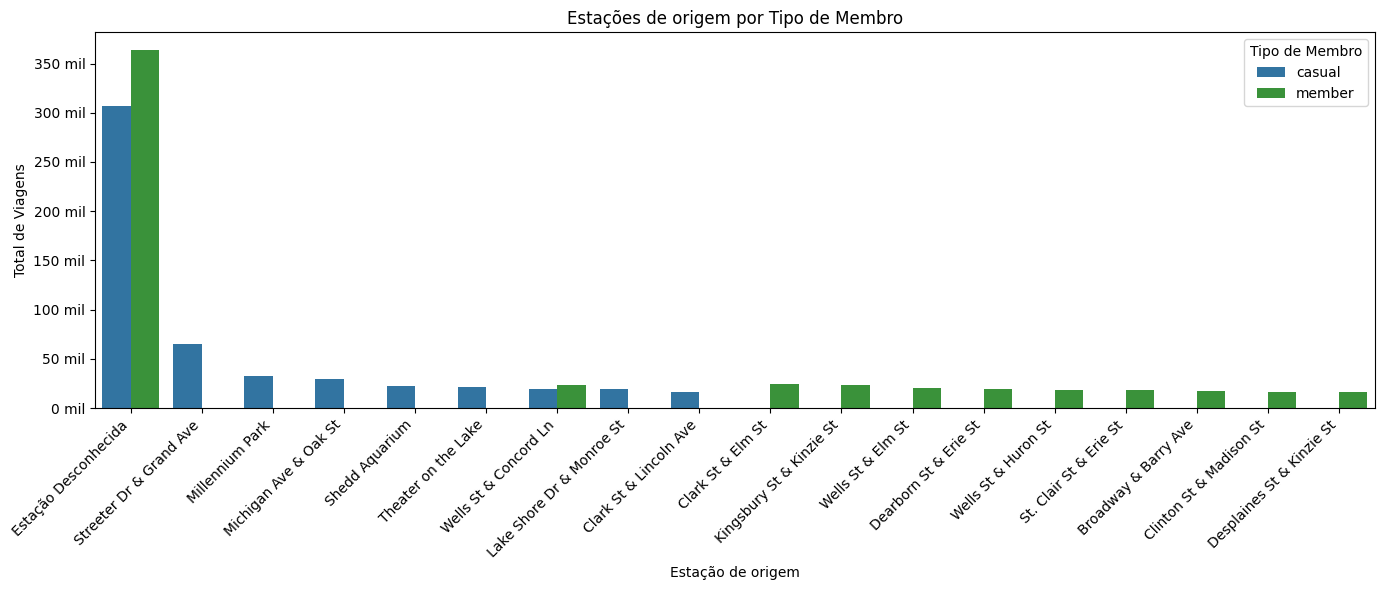

In [ ]:
# Desenho e apresentação gráfica
plt.figure(figsize=(14, 6))

cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}


sns.barplot(
    data=arq,
    x='estacao_origem',
    y='total_viagens',
    hue='tipo_uso',
    palette=cores
)

plt.title('Estações de origem por Tipo de Membro')
plt.xlabel('Estação de origem')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Membro')

formatter = FuncFormatter(lambda x, _: f'{int(x/1000)} mil')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Horários por tipo de membro

In [ ]:
# Caminho do gráfico e formatação da hora
cm_hora = '/content/drive/MyDrive/Analises/2021/hora_movimento.csv'
arq_hora = pd.read_csv(cm_hora)
arq_hora.loc[:, 'hora_formatada'] = arq_hora['hora'].astype(int).astype(str) + 'h'

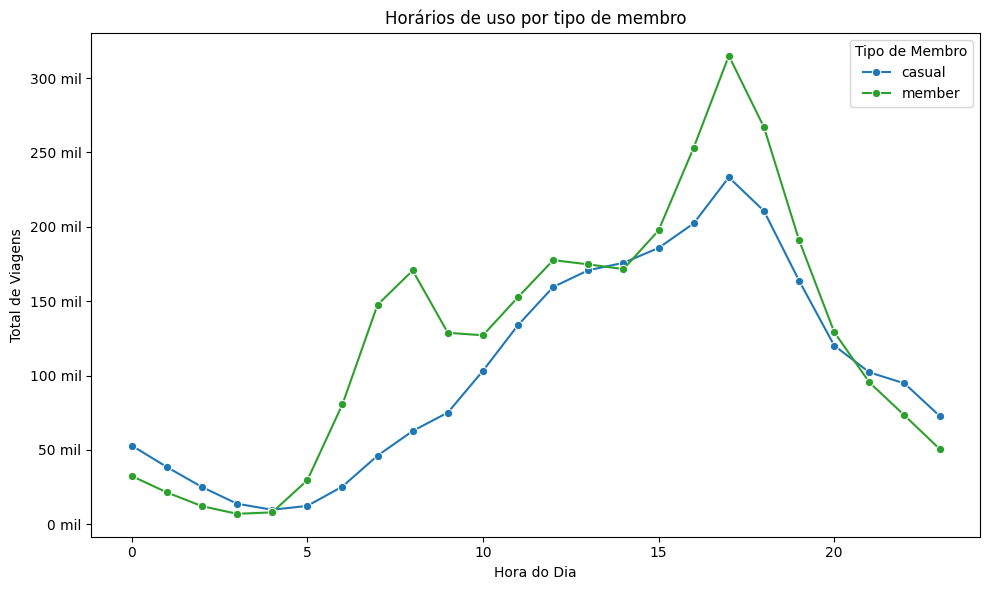

In [ ]:
plt.figure(figsize=(10, 6))

cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}

sns.lineplot(
    data=arq_hora,
    x='hora',
    y='total',
    hue='tipo_uso',
    marker='o',
    palette=cores,
    errorbar=None
)


plt.title('Horários de uso por tipo de membro')
plt.xlabel('Hora do Dia')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=0)
plt.grid(False)
plt.legend(title='Tipo de Membro', loc='upper right')
formatter = FuncFormatter(lambda x, _: f'{int(x/1000)} mil')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Duração média ao longo do dia

In [ ]:
#Caminho do arquivo
cm_uso2 = '/content/drive/MyDrive/Analises/2021/media_hora_bike.csv'
arq_uso = pd.read_csv(cm_uso2)
arq_uso.columns.tolist()


['hora_do_dia', 'tipo_uso', 'rideable_type', 'duracao_media_min']

<Figure size 1200x600 with 0 Axes>

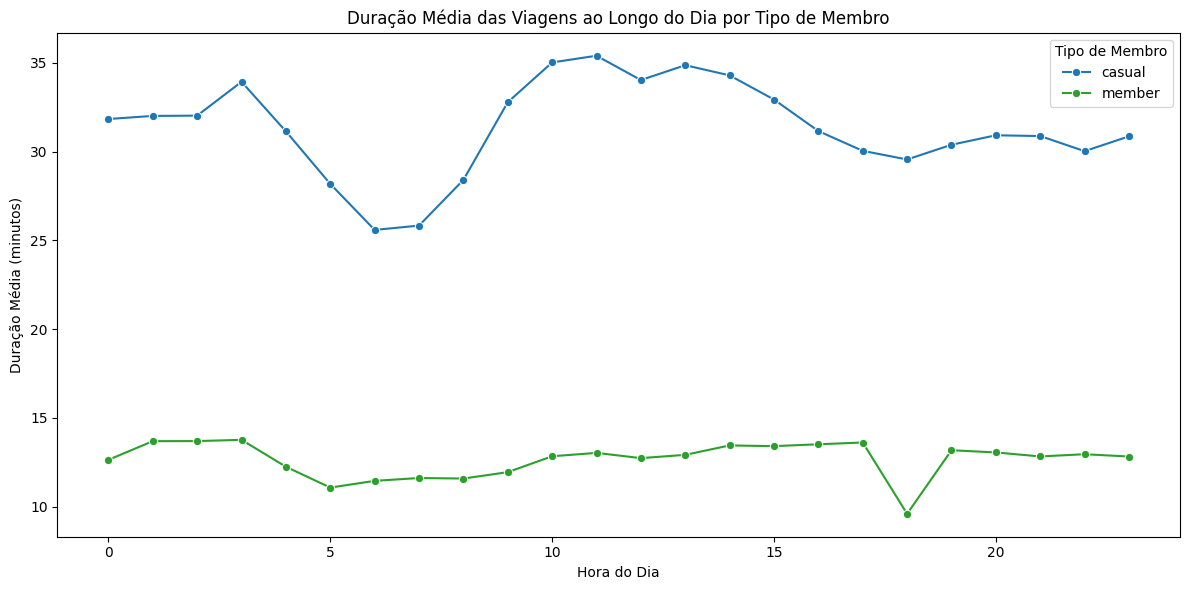

In [ ]:
#Desenho do gráfico
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}

sns.lineplot(
    data=arq_uso,
    x='hora_do_dia',
    y='duracao_media_min',
    hue='tipo_uso',
    marker='o',
    palette=cores,
    errorbar=None
)

plt.title('Duração Média das Viagens ao Longo do Dia por Tipo de Membro')
plt.xlabel('Hora do Dia')
plt.ylabel('Duração Média (minutos)')
plt.xticks(rotation=0)
plt.grid(False)
plt.legend(title='Tipo de Membro', loc='upper right')
plt.tight_layout()
plt.show()

Duração média por tipo de bike

In [ ]:
# Caminho do gráfico e importação do arquivo
cm_media = '/content/drive/MyDrive/Analises/2021/media_tipo_bike.csv'
arq_tipo2 = pd.read_csv(cm_media)
arq_tipo2.columns.tolist()

['tipo_uso', 'rideable_type', 'duracao_media_min']

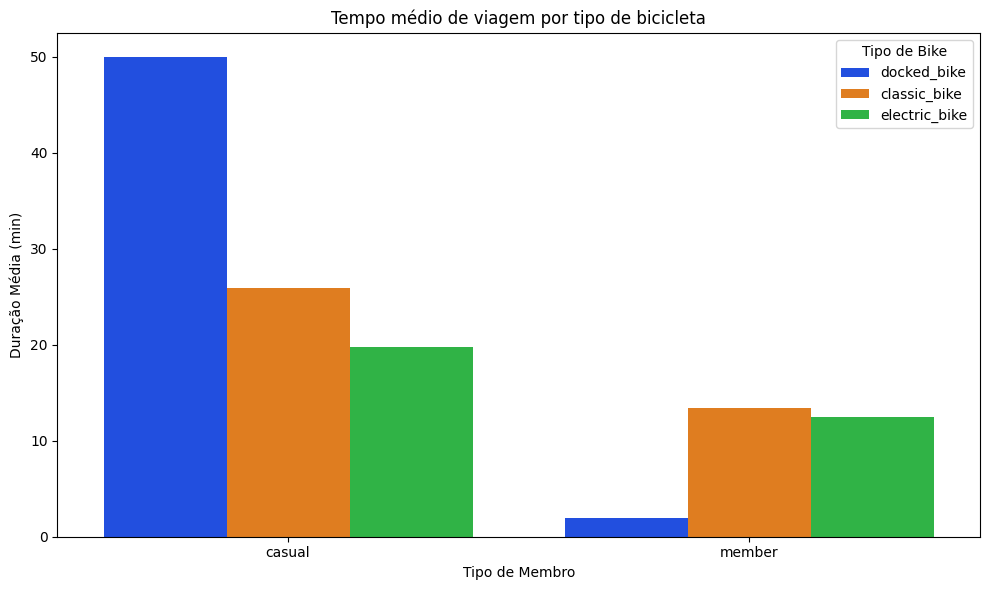

In [ ]:
# Desenho do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=arq_tipo2,
    x='tipo_uso',
    y='duracao_media_min',
    hue='rideable_type',
    palette='bright'
)

plt.title('Tempo médio de viagem por tipo de bicicleta')
plt.xlabel('Tipo de Membro')
plt.ylabel('Duração Média (min)')
plt.legend(title='Tipo de Bike')
plt.tight_layout()
plt.show()

Meses

In [ ]:
#Caminho do arquivo
cm_meses = '/content/drive/MyDrive/Analises/2021/meses_uso.csv'
df_meses = pd.read_csv(cm_meses)
df_meses.columns.tolist()

#Importação da biblioteca
import calendar

df_meses['mes_nome'] = df_meses['mes'].astype(int).apply(lambda x: calendar.month_abbr[x])
ordem_meses = list(calendar.month_abbr)[1:]


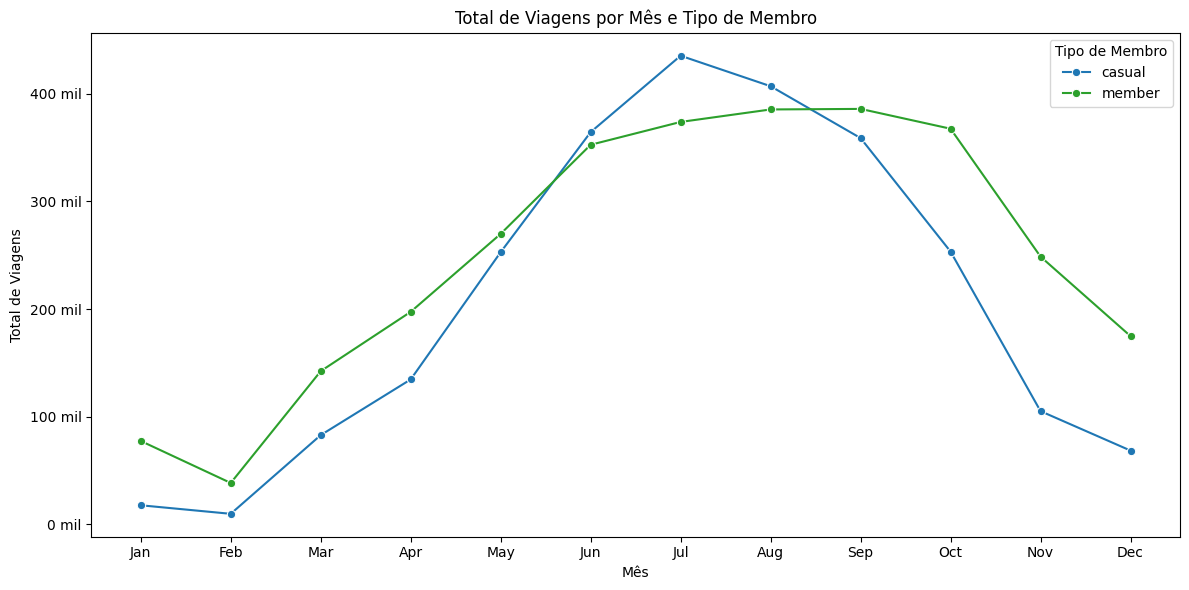

In [ ]:
#Desenho do gráfico
plt.figure(figsize=(12, 6))

cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}


sns.lineplot(
    data=df_meses,
    x='mes_nome',
    y='total_viagens',
    hue='tipo_uso',
    marker='o',
    palette=cores,
    errorbar=None
)


plt.title('Total de Viagens por Mês e Tipo de Membro')
plt.xlabel('Mês')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=0)
plt.grid(False)
plt.legend(title='Tipo de Membro', loc='upper right')
formatter = FuncFormatter(lambda x, _: f'{int(x/1000)} mil')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()


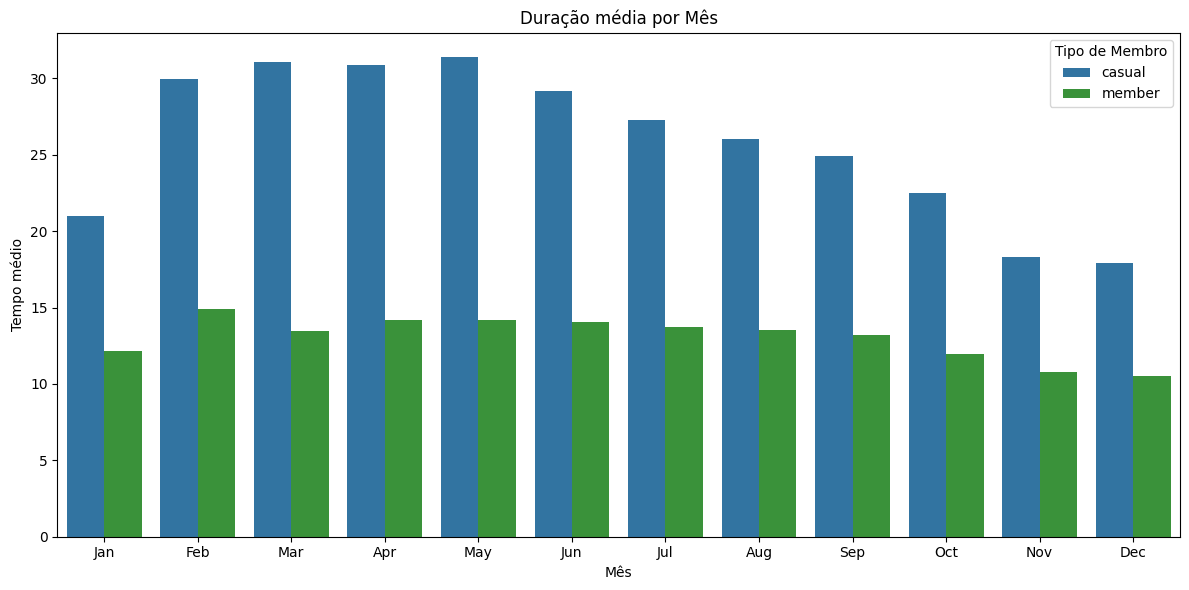

In [ ]:
plt.figure(figsize=(12, 6))

cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}

sns.barplot(
    data=df_meses,
    x='mes_nome',
    y='duracao_media',
    hue='tipo_uso',
    order=ordem_meses,
    palette=cores
)

plt.title('Duração média por Mês')
plt.xlabel('Mês')
plt.ylabel('Tempo médio')
plt.legend(title='Tipo de Membro')
plt.tight_layout()
plt.show()

Meses por tipo de bike

In [ ]:
#Caminho do arquivo e importação das bibliotecas
cm_bike = '/content/drive/MyDrive/Analises/2021/meses_bike1.csv'
dfb = pd.read_csv(cm_bike)
dfb.columns.tolist()

import calendar

dfb['mes_nome'] = dfb['mes'].astype(int).apply(lambda x: calendar.month_abbr[x])
ordem_meses = list(calendar.month_abbr)[1:]

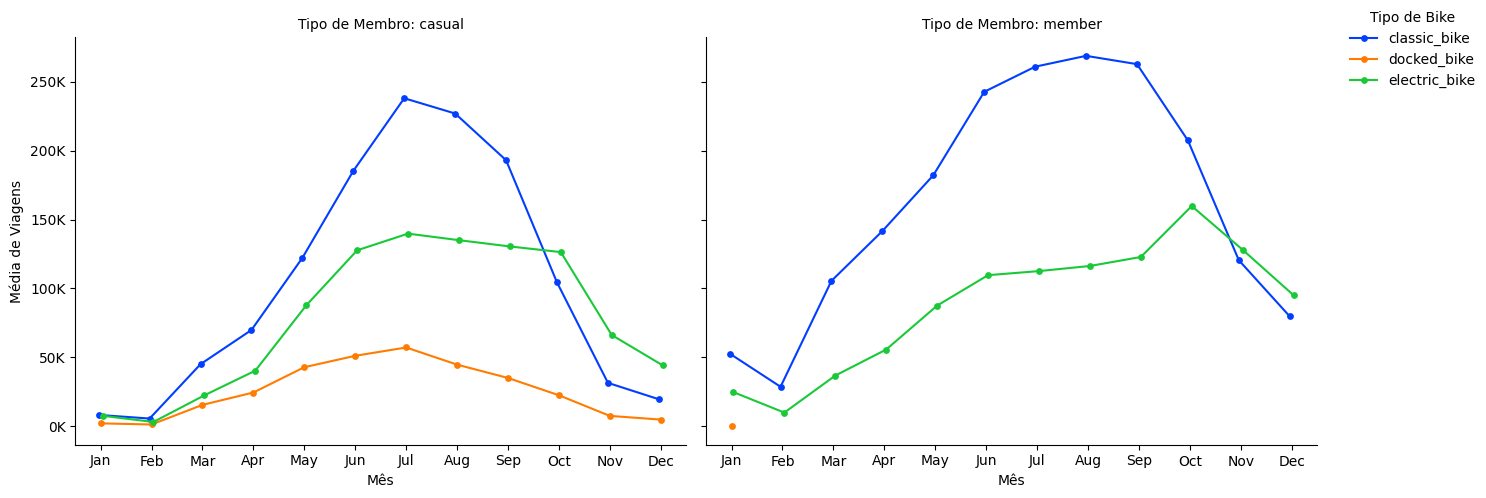

In [ ]:

# Desenho do gráfico
g = sns.catplot(
    data=dfb,
    x='mes_nome',
    y='total_viagens',
    hue='tipo_bike',
    col='tipo_membro',
    kind='point',
    order=ordem_meses,
    palette='bright',
    height=5,
    aspect=1.2,
    markers='o',
    linestyles='-',
    dodge=True,
    linewidth=1.5
)

g.set_titles('Tipo de Membro: {col_name}')
g.set_axis_labels('Mês', 'Média de Viagens')

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
    ax.grid(False)

if g._legend:
    g._legend.set_bbox_to_anchor((1, 1))
    g._legend.set_loc('upper left')
    g._legend.set_title("Tipo de Bike")

plt.tight_layout()
plt.show()

Tipos de bike por membro

In [ ]:
#Caminho do arquivo e leitura do csv
cm_tipo = '/content/drive/MyDrive/Analises/2021/tipo_bike.csv'
dft = pd.read_csv(cm_tipo)
dft.columns.tolist()

['rideable_type', 'tipo_uso', 'total']

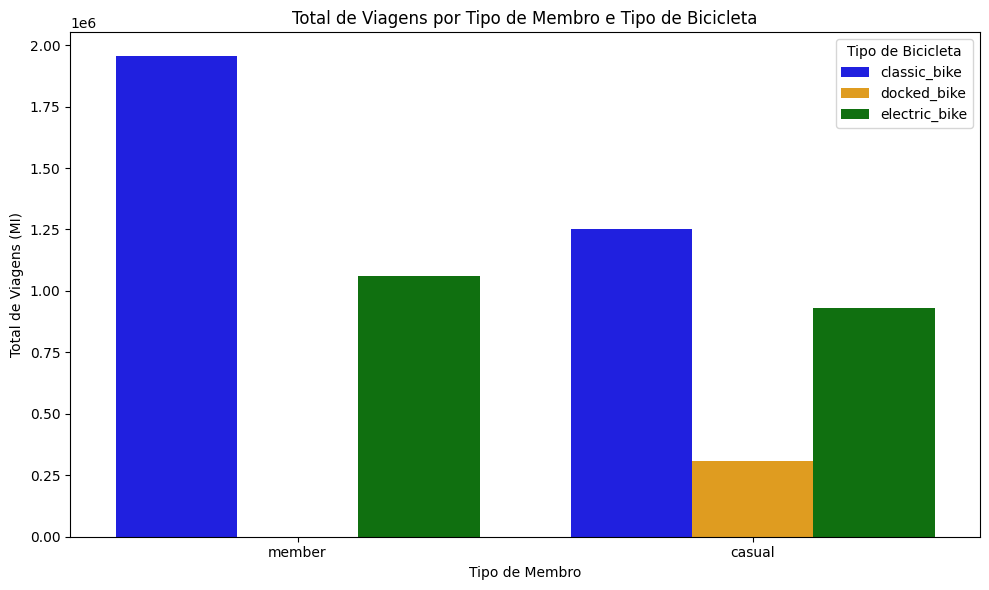

In [ ]:
#Desenho do gráfico
plt.figure(figsize=(10, 6))

custom_palette = {
    'electric_bike': 'green',
    'docked_bike': 'orange',
    'classic_bike': 'blue'
}
sns.barplot(
    data=dft,
    x='tipo_uso',
    y='total',
    hue='rideable_type',
    palette=custom_palette
)

plt.title('Total de Viagens por Tipo de Membro e Tipo de Bicicleta')
plt.xlabel('Tipo de Membro')
plt.ylabel('Total de Viagens (MI)')
plt.legend(title='Tipo de Bicicleta', loc='upper right')
plt.tight_layout()
plt.show()

Dias da semana

In [ ]:
#Caminho do arquivo
cm3= '/content/drive/MyDrive/Analises/2021/dias_semana.csv'
ds = pd.read_csv(cm3)
ds.columns.tolist()

['dia_semana', 'tipo_uso', 'rideable_type', 'total_viagens']

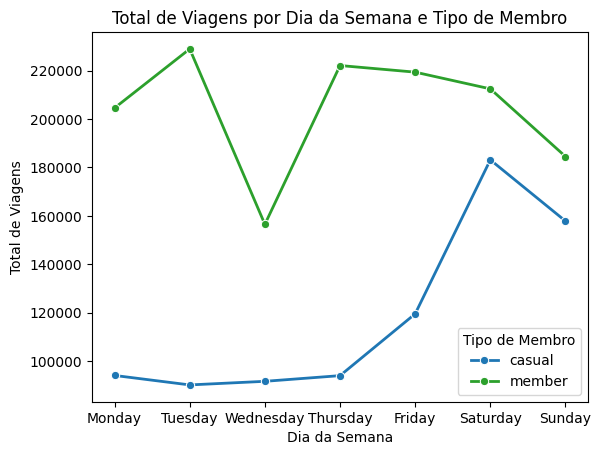

In [ ]:
#Desenho do gráfico
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ds['dia_semana'] = pd.Categorical(ds['dia_semana'], categories=ordem_dias, ordered=True)
cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}


sns.lineplot(
    data=ds,
    x='dia_semana',
    y='total_viagens',
    hue='tipo_uso',
    palette=cores,
    marker='o',
    linewidth=2,
    errorbar=None,
)

plt.title('Total de Viagens por Dia da Semana e Tipo de Membro')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Membro')